In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/Lenovo/Desktop/EBAC')

In [27]:
fuel = pd.read_excel('FuelConsumptionCo2.xlsx')
fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


In [29]:
# Remover caracteristicas categoricas
fuel.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE'], axis=1, inplace=True)
#Remover renglones con valores faltantes
fuel.dropna(inplace=True)
fuel

,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,9.9,7.0,8.6,33,200
1,12.6,9.4,11.2,25,263
2,11.0,8.6,9.9,29,232
3,11.3,9.1,10.3,27,242
4,11.2,8.0,9.8,29,230
...,...,...,...,...,...
940,10.7,7.7,9.4,30,219
941,10.5,8.1,9.4,30,219
942,11.0,8.7,9.9,29,232
943,11.5,8.4,10.1,28,236


<Axes: >

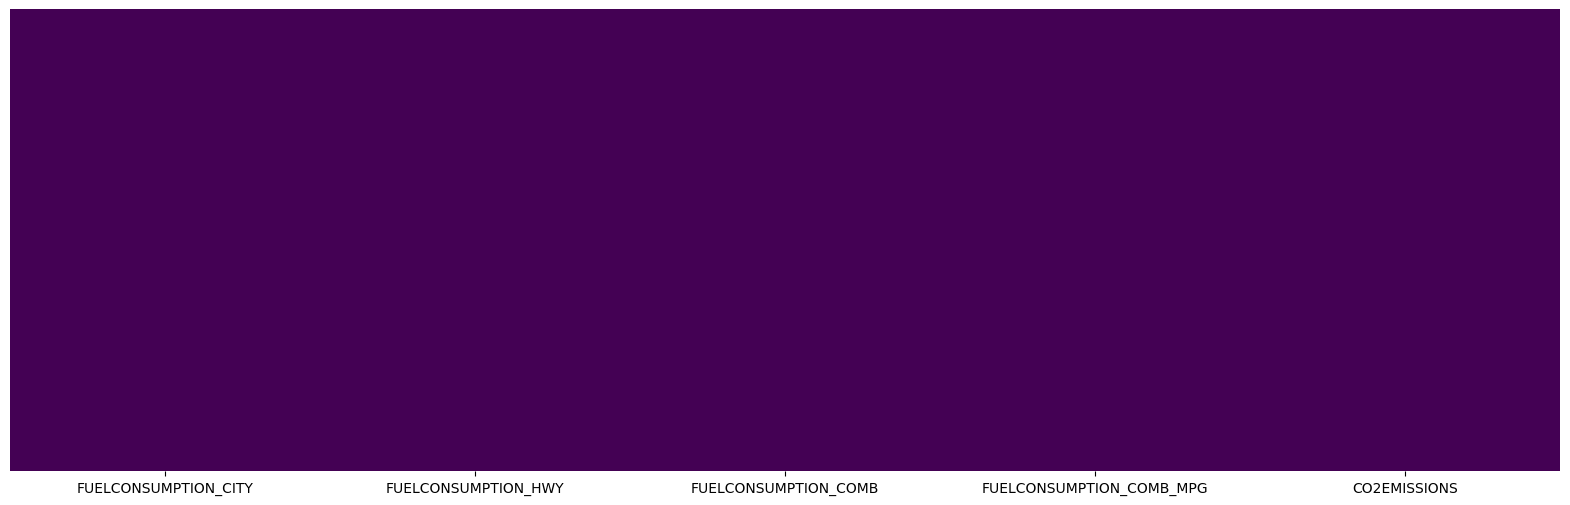

In [31]:
plt.figure(figsize=(20,6))
sns.heatmap(fuel.isnull(), yticklabels= False, cbar= False, cmap= 'viridis')

In [33]:
X = fuel.drop('CO2EMISSIONS', axis = 1) 
y = fuel['CO2EMISSIONS']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [37]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [39]:
# Impresion de coeficientes de regresion
print('Intercepto: ', linreg.intercept_)
print('Coeficientes: ', linreg.coef_)

Intercepto:  95.93361319267356
Coeficientes:  [10.85607131  5.91025898  0.71589393 -1.33087138]


In [41]:
# Predicciones
y_pred =  linreg.predict(X_test)
y_pred

array([323.9684702 , 318.99111862, 351.63995823, 174.32801949,
       196.22179696, 246.30366202, 249.80010686, 327.69501755,
       323.43951275, 172.67624174, 272.69662047, 221.15870395,
       322.0301954 , 263.34932072, 183.81461788, 267.43679146,
       162.2817638 , 224.20058458, 334.07766686, 320.6056832 ,
       318.99111862, 340.5415991 , 254.69901248, 224.20058458,
       338.96141074, 205.27024177, 368.03937916, 321.36758011,
       297.85515221, 130.73051692, 180.24094285, 183.81461788,
       247.36441388, 296.30265608, 318.85746077, 280.22130457,
       326.34493169, 309.94267381, 323.43951275, 223.34507996,
       296.33986926, 284.3860055 , 235.0688412 , 185.37275481,
       170.09172917, 255.95265367, 194.22831029, 341.07055655,
       143.31137086, 184.67012251, 295.61518552, 246.56814074,
       170.18817383, 258.29190199, 109.70865471, 313.74361439,
       341.56513778, 333.81318814, 304.22547674, 371.84035287,
       198.65748995, 154.71706269, 189.63109657, 311.02

In [43]:
# Calculo de indicadores de bondad de ajuste
from sklearn.metrics import r2_score
from sklearn import metrics
# Impresion de indicadores de bondad de ajuste
print("Valor de R cuadrada", r2_score(y_test, y_pred))
print('Error absoluto medio: ', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadratico medio: ', metrics.mean_squared_error(y_test, y_pred))
print('Raiz del Error cuadratico medio: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Valor de R cuadrada 0.9809388418270502
Error absoluto medio:  5.694519664627076
Error cuadratico medio:  72.94435631403724
Raiz del Error cuadratico medio:  8.540746824138814


# Modelo de Ridge

In [48]:
from sklearn.linear_model import RidgeCV
# Definicion un rango de prueba para Alpha
alpha_range = 10.**np.arange(-2,3)
ridgeregcv = RidgeCV(alphas = alpha_range, scoring = 'neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

10.0

In [50]:
# Prediccion mediante el valor de Alpha
y_pred = ridgeregcv.predict(X_test)

# Impresion de indicadores de bondad de ajuste
print("Valor de R cuadrada", r2_score(y_test, y_pred))
print('Error absoluto medio: ', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadratico medio: ', metrics.mean_squared_error(y_test, y_pred))
print('Raiz del Error cuadratico medio: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Valor de R cuadrada 0.9808997033817982
Error absoluto medio:  5.709158252323924
Error cuadratico medio:  73.09413360826727
Raiz del Error cuadratico medio:  8.549510723326058


In [52]:
# Examinar coeficientes de la regresion Ridge
print('Intercepto: ', ridgeregcv.intercept_)
print('Coeficientes: ', ridgeregcv.coef_)

Intercepto:  97.12499222320125
Coeficientes:  [ 8.07997596  3.67823551  5.67297035 -1.35146758]


# Modelo de Lasso

In [55]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas = 100, random_state = 1)
lassoregcv.fit(X_train, y_train)
print('Alpha Optimo: ', lassoregcv.alpha_)

Alpha Optimo:  0.45442206714715033


In [57]:
# Examinar coeficientes de la regresion Lasso
print('Intercepto: ', lassoregcv.intercept_)
print('Coeficientes: ', lassoregcv.coef_)

Intercepto:  99.64116220383292
Coeficientes:  [11.10723214  5.8512792   0.28317683 -1.38536394]


In [59]:
# Prediccion mediante regresion de Lasso con un Alpha Optimo
y_pred = lassoregcv.predict(X_test)

# Impresion de indicadores de bondad de ajuste
print("Valor de R cuadrada", r2_score(y_test, y_pred))
print('Error absoluto medio: ', metrics.mean_absolute_error(y_test, y_pred))
print('Error cuadratico medio: ', metrics.mean_squared_error(y_test, y_pred))
print('Raiz del Error cuadratico medio: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Valor de R cuadrada 0.980417172261453
Error absoluto medio:  5.842640097466095
Error cuadratico medio:  74.94071195653494
Raiz del Error cuadratico medio:  8.656830364315507


Luego de desarrollar los 3 modelos, llegue a la conclusion que en este caso el modelo que tiene la R2 mas cerca del 1, fue la regresion lineal multiple. Aunque estamos hablando de milesimas de diferencia, lo que en este caso, tendria la confianza de usar cualquiera de los 3.